In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/barometer.csv', index_col='date', parse_dates=True)
data

,spy_o,spy_h,spy_l,spy_c,barometer_o,barometer_h,barometer_l,barometer_c,barometer
date,,,,,,,,,
2011-01-04,127.330002,127.370003,126.190002,126.980003,0.735481,0.710530,0.730327,0.729934,0.726568
2011-01-05,126.580002,127.720001,126.459999,127.639999,0.736918,0.727733,0.737165,0.732595,0.733603
2011-01-06,127.690002,127.830002,127.010002,127.389999,0.745475,0.720345,0.746339,0.719064,0.732806
2011-01-07,127.559998,127.769997,126.150002,127.139999,0.781980,0.732595,0.809199,0.785495,0.777317
2011-01-10,126.580002,127.160004,126.199997,126.980003,0.687680,0.663571,0.712473,0.713326,0.694263
...,...,...,...,...,...,...,...,...,...
2022-01-14,461.190002,465.079987,459.899994,464.910004,0.620576,0.471995,0.767337,0.755120,0.653757
2022-01-18,459.739990,459.940002,455.309998,455.795013,0.429370,0.268573,0.419489,0.296622,0.353514
2022-01-19,458.130005,459.612000,452.660004,452.670013,0.266237,0.258511,0.390518,0.324515,0.309945


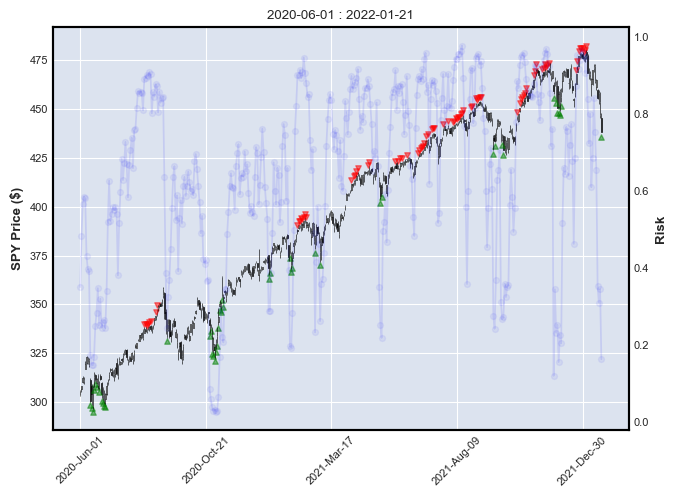

In [17]:
df = data.iloc[-416:].copy()

signal = df.barometer.map(lambda x: x < 0.3)
indx_list = signal[signal == True].index
df_signal_up = pd.DataFrame()
df_signal_up.index = signal.index
df_signal_up['value'] = np.NaN
for indx in indx_list:  
    df_signal_up.loc[indx] = df.loc[indx]['spy_l'] * 0.995

signal = df.barometer.map(lambda x: x > 0.87)
indx_list = signal[signal == True].index
df_signal_down = pd.DataFrame()
df_signal_down.index = signal.index
df_signal_down['value'] = np.NaN
for indx in indx_list:  
    df_signal_down.loc[indx] = df.loc[indx]['spy_h'] * 1.005

apds = [
    mpf.make_addplot(df_signal_up,type='scatter',markersize=15,color = 'green',alpha = 0.5, marker='^'),
    mpf.make_addplot(df_signal_down,type='scatter',markersize=15,color = 'red',alpha = 0.5, marker='v'),   
    mpf.make_addplot(df.barometer, type='line', alpha = 0.1, color = 'blue', ylabel = 'Risk'), 
    mpf.make_addplot(df.barometer, type='scatter', alpha = 0.05, color = 'blue', ylabel = 'Risk'), 

    
    ]

mpf.plot(
            df.rename(columns={"spy_o": "Open", "spy_h": "High", 
                                       "spy_l": "Low", "spy_c": "Close"}),
            type='candle', 
            ylabel='SPY Price ($)',
            addplot=apds,
            figscale=1,
            style = mpf.make_mpf_style(base_mpf_style='default', rc={'font.size':8}), 
            axtitle='{} : {}'.format(str(df.index[0])[:10], str(df.index[-1])[:10]),
         )  

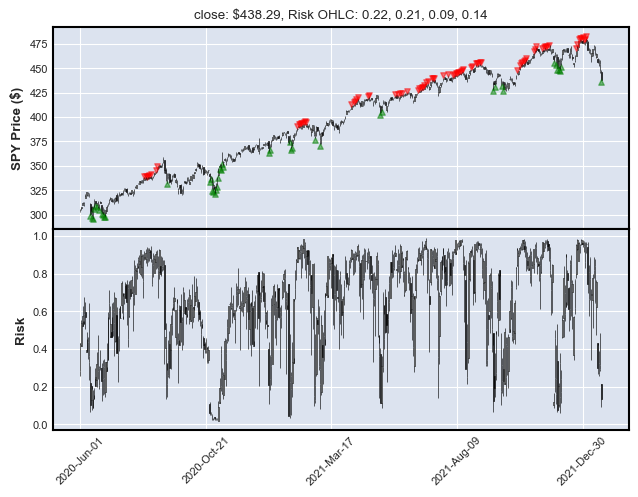

In [19]:
days = 416
apds = [
    mpf.make_addplot(df.iloc[-days:].rename(columns={"barometer_o": "Open", "barometer_l": "High", "barometer_h": "Low", "barometer_c": "Close"}),
                        type='candle', color = 'red', alpha = 0.3, width = 1.0, panel = 1, ylabel = 'Risk'), 
    mpf.make_addplot(df_signal_up.iloc[-days:],type='scatter',markersize=15,color = 'green',alpha = 0.5, marker='^'),
    mpf.make_addplot(df_signal_down.iloc[-days:],type='scatter',markersize=15,color = 'red',alpha = 0.5, marker='v'),
]



mpf.plot(
            df.iloc[-days:].rename(columns={"spy_o": "Open", "spy_h": "High", 
                                "spy_l": "Low", "spy_c": "Close"}),
            type='candle', 
            ylabel='SPY Price ($)',
            addplot=apds,
            panel_ratios=(1,1),
            figscale=1,
            style = mpf.make_mpf_style(base_mpf_style='default', rc={'font.size':8}),    
            axtitle='close: ${:.02f}, Risk OHLC: {:.02f}, {:.02f}, {:.02f}, {:.02f}'.format( df.iloc[-1].spy_c, df.barometer_o.iloc[-1], df.barometer_l.iloc[-1], df.barometer_h.iloc[-1], df.barometer_c.iloc[-1]),
        )